# Lecture 3 - Introduction to Python (part III)
--- 

## Logistics

1. Solutions to the HWs are posted on the course channel as well as the GitHub repo. 




# What Are Functions in Python?

Functions are one of the core building blocks in Python, allowing you to organize your code into reusable, modular pieces. A **function** is a block of code designed to perform a specific task, and it can be executed when called.

## Why Use Functions?

- **Reusability**: Write once, use multiple times. Avoid repetition by encapsulating logic into functions.
- **Readability**: Break down complex code into smaller, manageable chunks.
- **Maintainability**: Easier to debug and modify your code by isolating specific functionality.
- **Scalability**: Functions allow you to build scalable programs that can grow in complexity without becoming unmanageable.

## Anatomy of a Function

Here is the structure of a function in Python:

```python
def function_name(parameters):
    """
    Optional: A docstring to describe what the function does.
    """
    # Code block
    return result
```

### Key Components:
1. **`def`**: The keyword used to define a function.
2. **`function_name`**: The name of the function, which should describe its purpose.
3. **`parameters`**: Optional inputs to the function (enclosed in parentheses). These allow you to pass data into the function.
4. **Docstring**: An optional string describing the function's purpose and behavior.
5. **Code block**: The body of the function containing the operations it performs.
6. **`return`**: An optional statement used to send the function’s output back to the caller.

## Example: A Simple Function

```python
def greet(name):
    """
    Greets a person by their name.
    """
    message = "Hello, " + name 
    return message

# Calling the function
message = greet("Arman")
print(message)  # Output: Hello, Arman!
```

## Types of Functions

1. **Built-in Functions**: Predefined functions in Python, like `len()`, `print()`, and `sum()`.
2. **User-defined Functions**: Functions that you create to solve specific problems.
3. **Lambda Functions**: Anonymous, one-line functions used for short operations.

## Summary

Functions make your code:
- **Efficient**: By avoiding code repetition.
- **Structured**: By dividing functionality into smaller parts.
- **Dynamic**: By accepting parameters and returning results.

Start incorporating functions into your Python scripts to make them more robust and easier to maintain!


# Example 1: Write a Function to Calculate the GC Content of a DNA Sequence

In this exercise, you will write a Python function that calculates the **GC content** of a DNA sequence.

## What Is GC Content?

The **GC content** of a DNA sequence is the percentage of nucleotides in the sequence that are either **G** (guanine) or **C** (cytosine). This is an important measure in genetics and bioinformatics, as GC content can influence the stability and function of DNA.

### Formula:

$$ GC \text{ Content (\%) } = \frac{\text{Count of G + Count of C}}{\text{Total Length of Sequence}} \times 100 $$

### Example:
Given the DNA sequence:  
`ATGCGCGT`

1. Count of `G`: 3  
2. Count of `C`: 3  
3. Total length: 8  

GC Content = \((3 + 3) / 8 	imes 100 = 75\%\)

## Why Is GC Content Important?

1. **DNA Stability**: GC pairs are connected by three hydrogen bonds, whereas AT pairs have only two. A higher GC content generally leads to greater thermal stability of the DNA molecule.
2. **Gene Expression**: Regions with high GC content, like CpG islands, are often associated with gene promoters and regulation of gene expression.
3. **Taxonomy and Evolution**: GC content varies between organisms and can be used as a distinguishing feature in evolutionary studies and species classification.
4. **Sequencing and PCR**: Knowledge of GC content is critical for designing primers and optimizing PCR protocols, as it affects the annealing temperature.

## Task

1. Write a function named `gc_content` that:
   - Accepts a DNA sequence as input.
   - Returns the GC content as a percentage.

2. Read the DNA sequence from a **FASTA file** named `Ecoli_genome.fasta`. Assume the file contains a valid DNA sequence.

### Steps to Implement:

1. **Parse the FASTA File**:
   Use Python to open and read the `Ecoli_genome.fasta` file. Skip the header line (starting with `>`), and extract the sequence.

2. **Write the Function**:
   Define the `gc_content` function to compute the GC content of the sequence.

3. **Test the Function**:
   Print the GC content of the sequence read from the FASTA file.


### Challenge:
Test your function on sequences of varying lengths and GC content levels!


In [1]:
# One method to implement the function
def gc_content(DNA,is_rna = False):
    len_DNA = len(DNA)
    c_count = 0
    g_count = 0 
    for x in DNA:
        if x == "C":
            c_count = c_count + 1 
        elif x == "G":
            g_count = g_count + 1
    gc = ((c_count+g_count)/len_DNA)*100
    return gc 

gc_example_1 = gc_content("AAT",False)
print(gc_example_1)

0.0


In [2]:
# Another method to implement the function
def gc_content(DNA,is_rna = False):
    len_DNA = len(DNA)
    c_count = 0
    g_count = 0 
    for i in range(len(DNA)):
        if DNA[i] == "C":
            c_count = c_count + 1 
        elif DNA[i] == "G":
            g_count = g_count + 1
    gc = ((c_count+g_count)/len_DNA)*100
    return gc 

In [3]:
# Let's spend some time working on this example 
from Bio import SeqIO

# Path to your FASTA file
fasta_file = "/Users/arman/Arman/Teaching/TUMS2025/data/ecoli_genome.fasta"

# Read the FASTA file and extract the sequence
ecoli_genome = ""

for record in SeqIO.parse(fasta_file, "fasta"):
    ecoli_genome += str(record.seq)

# Verify the sequence length or contents
print(f"Length of the E. coli genome: {len(ecoli_genome)}")

Length of the E. coli genome: 4639675


In [4]:
gc_content_ecoli = gc_content(ecoli_genome)
print("GC content of E.coli is ",gc_content_ecoli)


GC content of E.coli is  50.78969970957018


In [6]:
def gc_content_window(DNA):
    DNA_to_use = DNA[0]
    counter = 0 
    gc_acc = [] # list 
    while len(DNA_to_use) != len(DNA):
        gc = gc_content(DNA_to_use)
        gc_acc.append(gc)
        counter = counter +1 
        DNA_to_use = DNA_to_use + DNA[counter]
    return gc_acc 

In [7]:
gc_content_ecoli = gc_content_window(ecoli_genome[:20000])

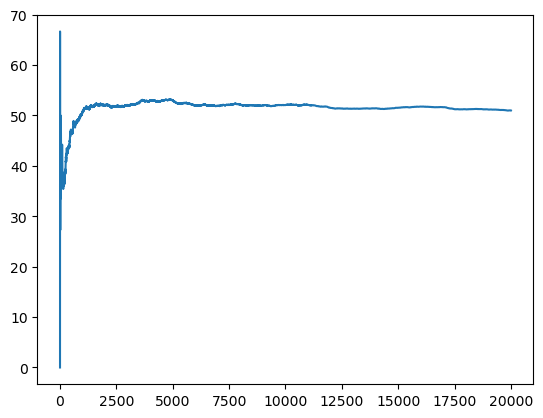

In [8]:
import matplotlib.pyplot as plt 


plt.plot(gc_content_ecoli)

# Example 3: Define a `Sequence` Class

In this exercise, you will define a class named `Sequence` to represent biological sequences. The class will encapsulate attributes and methods to handle DNA and RNA sequences and perform common operations.

---

## Task

1. Create a class called `Sequence` with the following:
    - **Attributes**:
        - `sequence`: The nucleotide sequence (string).
        - `is_rna`: A boolean flag indicating whether the sequence is RNA (`True`) or DNA (`False`).

    - **Methods**:
        1. **`reverse`**:
            - Returns the reverse of the sequence.
        2. **`complement`**:
            - Returns the complement of the sequence.
            - Use `A ↔ T`, `C ↔ G` for DNA and `A ↔ U`, `C ↔ G` for RNA.
        3. **`reverse_complement`**:
            - Returns the reverse complement of the sequence.
        4. **`gc_content`**:
            - Calculates and returns the GC content of the sequence as a percentage.

---

## Example Usage:

```python
# Create a DNA sequence instance
dna_seq = Sequence("ATGCGCGT", is_rna=False)

# Reverse the sequence
print(dna_seq.reverse())  # Output: TGCGCGTA

# Complement the sequence
print(dna_seq.complement())  # Output: TACGCGCA

# Reverse complement the sequence
print(dna_seq.reverse_complement())  # Output: ACGCGCAT

# Calculate GC content
print(dna_seq.gc_content())  # Output: 75.0

# Create an RNA sequence instance
rna_seq = Sequence("AUGCGCGU", is_rna=True)

# Perform similar operations for RNA
print(rna_seq.reverse())  # Output: UGCGCGUA
print(rna_seq.complement())  # Output: UACGCGCA
print(rna_seq.reverse_complement())  # Output: ACGCGCAU
print(rna_seq.gc_content())  # Output: 75.0
```

---

## Challenge:
1. Extend the `Sequence` class to include additional methods, such as:
    - **Transcription**: Convert a DNA sequence to RNA.
    - **Translation**: Translate an RNA sequence into a protein sequence.
2. Validate sequences on initialization to ensure they contain only valid nucleotides (A, T, C, G for DNA; A, U, C, G for RNA).


In [9]:
# Let's spend some time working on this example 
class Sequence:
    def __init__(self, sequence, is_rna=False):
        self.sequence = sequence.upper()
        self.is_rna = is_rna
        self.validate_sequence()

    def validate_sequence(self):
        valid_nucleotides = "AUCG" if self.is_rna else "ATCG"
        for nucleotide in self.sequence:
            if nucleotide not in valid_nucleotides:
                raise ValueError(f"Invalid nucleotide {nucleotide} for {'RNA' if self.is_rna else 'DNA'} sequence.")

    def reverse(self):
        return self.sequence[::-1]

    def complement(self):
        complement_map = {
            "A": "U" if self.is_rna else "T",
            "U": "A" if self.is_rna else None,
            "T": "A",
            "C": "G",
            "G": "C"
        }
        return "".join(complement_map[nuc] for nuc in self.sequence)

    def reverse_complement(self):
        return self.complement()[::-1]

    def gc_content(self):
        gc_count = self.sequence.count("G") + self.sequence.count("C")
        return (gc_count / len(self.sequence)) * 100

    def transcribe(self):
        if self.is_rna:
            raise ValueError("Transcription is not applicable for RNA sequences.")
        return self.sequence.replace("T", "U")

    def translate(self):
        if not self.is_rna:
            raise ValueError("Translation requires an RNA sequence.")
        codon_table = {
            "AUG": "M", "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
            "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
            "UAU": "Y", "UAC": "Y", "UAA": "Stop", "UAG": "Stop",
            "UGU": "C", "UGC": "C", "UGA": "Stop", "UGG": "W",
            "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
            "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
            "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
            "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
            "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
            "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
            "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
            "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
            "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
            "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
            "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
            "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G"
        }
        protein = []
        for i in range(0, len(self.sequence) - 2, 3):
            codon = self.sequence[i:i+3]
            if codon_table.get(codon) == "Stop":
                break
            protein.append(codon_table.get(codon, "?"))
        return "".join(protein)

# Example usage
# DNA Sequence
dna_seq = Sequence("ATGCGCGT", is_rna=False)
print(dna_seq.reverse())             # Output: TGCGCGTA
print(dna_seq.complement())          # Output: TACGCGCA
print(dna_seq.reverse_complement())  # Output: ACGCGCAT
print(dna_seq.gc_content())          # Output: 75.0
print(dna_seq.transcribe())          # Output: AUGCGCGU

# RNA Sequence
rna_seq = Sequence("AUGCGCGU", is_rna=True)
print(rna_seq.reverse())             # Output: UGCGCGUA
print(rna_seq.complement())          # Output: UACGCGCA
print(rna_seq.reverse_complement())  # Output: ACGCGCAU
print(rna_seq.gc_content())          # Output: 75.0
print(rna_seq.translate())           # Output: MR

TGCGCGTA
TACGCGCA
ACGCGCAT
62.5
AUGCGCGU
UGCGCGUA
UACGCGCA
ACGCGCAU
62.5
MR
